In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("FraudEDA") \
    .getOrCreate()

df = spark.read.csv("../data/creditcard.csv", header=True, inferSchema=True)
df.cache()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/02/17 21:27:52 WARN Utils: Your hostname, Yusukes-MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.100 instead (on interface en0)
26/02/17 21:27:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/17 21:28:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
26/02/17 21:28:31 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[Time: double, V1: double, V2: double, V3: double, V4: double, V5: double, V6: double, V7: double, V8: double, V9: double, V10: double, V11: double, V12: double, V13: double, V14: double, V15: double, V16: double, V17: double, V18: double, V19: double, V20: double, V21: double, V22: double, V23: double, V24: double, V25: double, V26: double, V27: double, V28: double, Amount: double, Class: int]

In [8]:
df.printSchema()
df.count()
len(df.columns)

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

31

In [9]:
from pyspark.sql.functions import col, sum

df.select([
    sum(col(c).isNull().cast("int")).alias(c)
    for c in df.columns
]).show()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+



In [11]:
df.groupBy("Class").count().show()

fraud = df.filter("Class = 1").count()
normal = df.filter("Class = 0").count()
print("Fraud ratio:", round(fraud/(fraud+normal), 5))

+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+

Fraud ratio: 0.00173


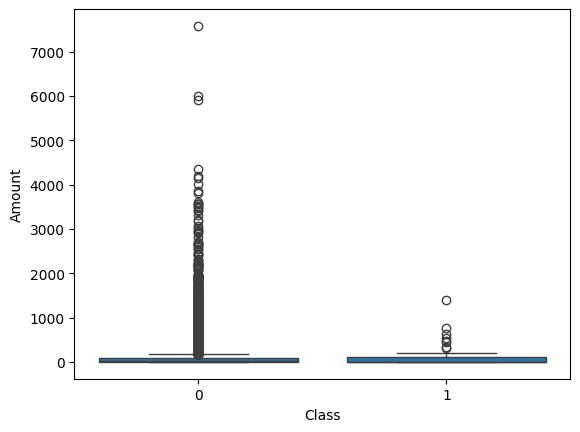

In [13]:
pdf = df.select("Amount", "Class").sample(0.1).toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Class", y="Amount", data=pdf)
plt.show()

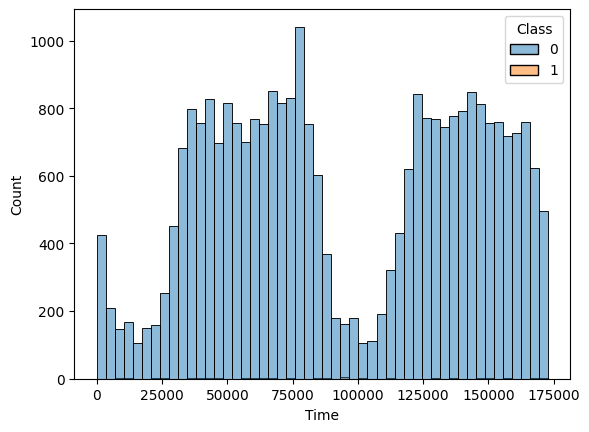

In [14]:
pdf = df.select("Time", "Class").sample(0.1).toPandas()

sns.histplot(data=pdf, x="Time", hue="Class", bins=50)
plt.show()

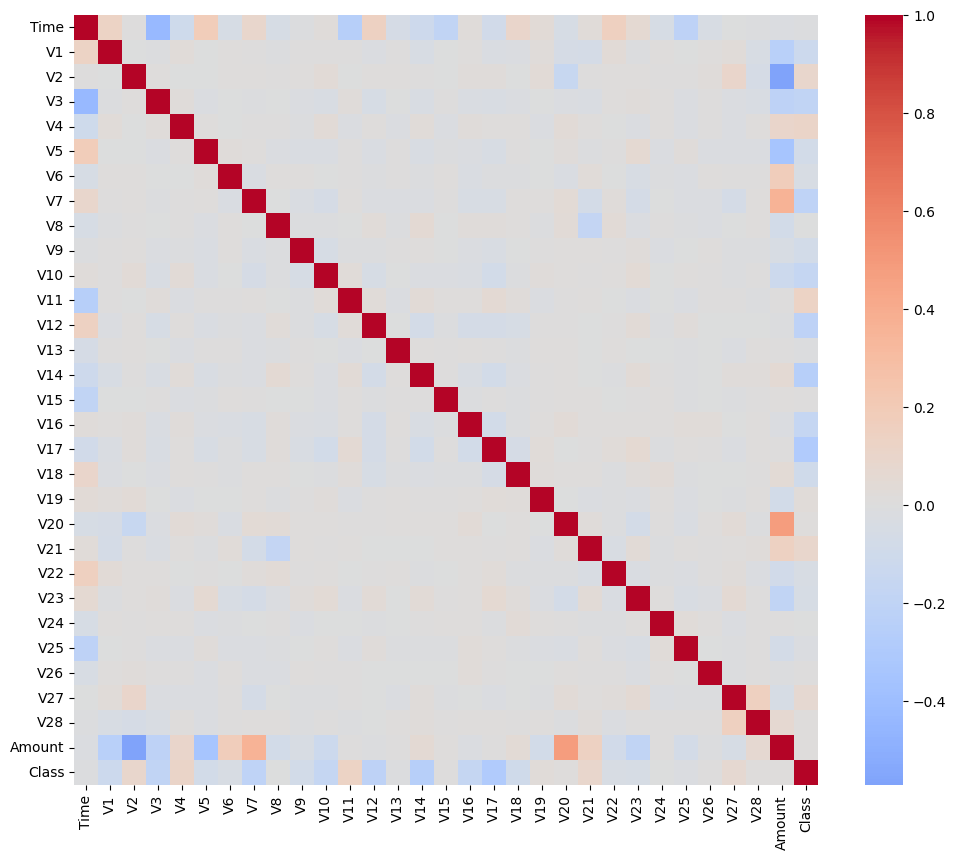

In [15]:
sample_df = df.sample(0.05).toPandas()

import numpy as np
corr = sample_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()